<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Urban-electric-aircraft-ML-optimization/blob/main/Body_ac_Simulated%20annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Maximum Front Convergence: 59.0
Optimal Maximum Back Convergence: 30.0
Optimal Minimum Drag Magnitude: 2302.48


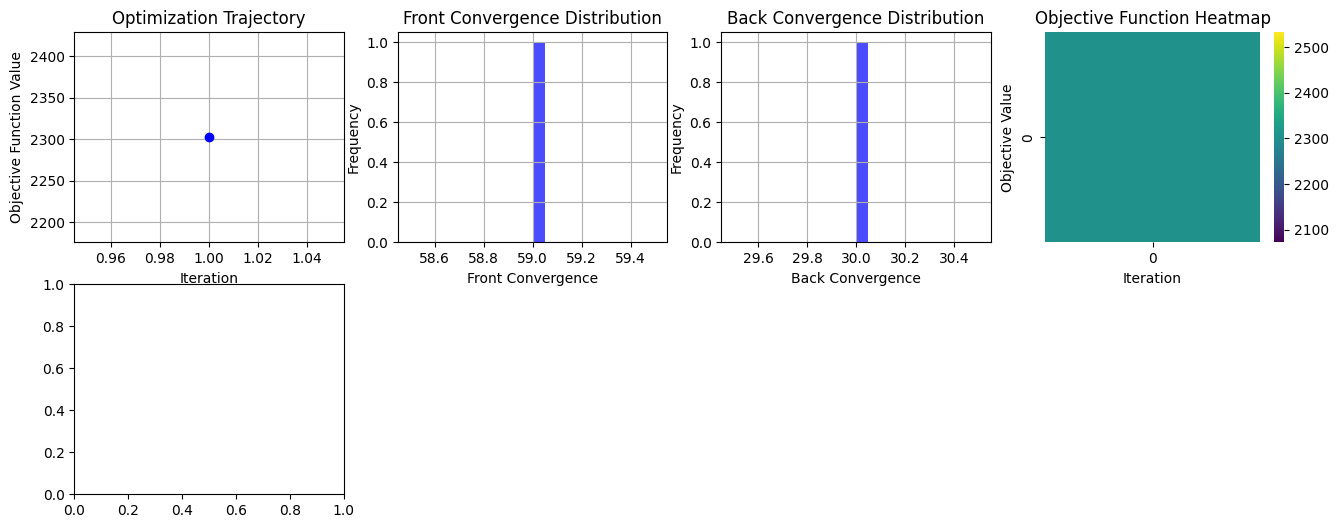

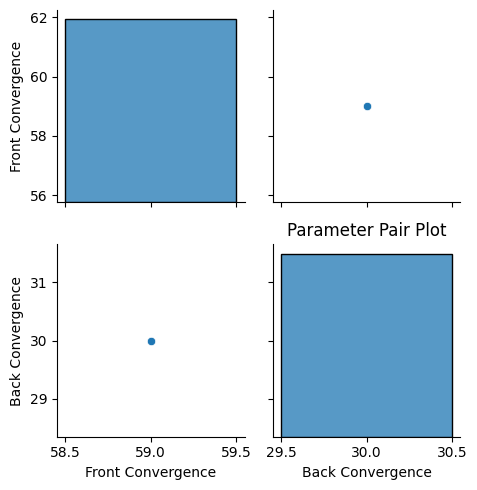

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from a CSV file (replace 'your_other_dataset.csv' with your file)
filepath = r'/content/Body set 1 data - Copy.xlsx'
data = pd.read_excel(filepath)

# Define the objective function to minimize Drag magnitude
def objective(x):
    front_convergence, back_convergence = x
    # Calculate Drag magnitude based on your dataset (replace this with your calculation)
    filtered_data = data[(data['Front convergence'] <= front_convergence) & (data['Back convergence'] <= back_convergence)]
    drag_magnitude = filtered_data['Drag magnitude'].min()
    return drag_magnitude

# Define constraints
max_front_convergence = 87.0  # Set your optimal maximum Front convergence constraint
max_back_convergence = 52.0  # Set your optimal maximum Back convergence constraint

constraints = ({'type': 'ineq', 'fun': lambda x: max_front_convergence - x[0]},
               {'type': 'ineq', 'fun': lambda x: max_back_convergence - x[1]})

# Randomly select an initial guess from the dataset
initial_guess = data.sample(1).values[0][0:2]  # Assuming the first 2 columns are Front Convergence, Back Convergence

# Lists to store optimization history
x_history = []
y_history = []

# Define a custom callback function to record optimization history
def record_history(x):
    x_history.append(x)
    y_history.append(objective(x))

# Run the simulated annealing optimization
result = minimize(objective, initial_guess, constraints=constraints, method='SLSQP', callback=record_history)

# Extract the results
optimal_max_front_convergence = result.x[0]
optimal_max_back_convergence = result.x[1]
optimal_min_drag_magnitude = result.fun

# Print the results
print("Optimal Maximum Front Convergence:", optimal_max_front_convergence)
print("Optimal Maximum Back Convergence:", optimal_max_back_convergence)
print("Optimal Minimum Drag Magnitude:", optimal_min_drag_magnitude)

# Visualize the optimization process
plt.figure(figsize=(16, 6))

# Plot 1: Optimization trajectory
plt.subplot(2, 4, 1)
plt.plot(range(1, len(y_history) + 1), y_history, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Optimization Trajectory")
plt.grid()

# Plot 2: Histogram of Front Convergence
plt.subplot(2, 4, 2)
plt.hist([x[0] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Front Convergence")
plt.ylabel("Frequency")
plt.title("Front Convergence Distribution")
plt.grid()

# Plot 3: Histogram of Back Convergence
plt.subplot(2, 4, 3)
plt.hist([x[1] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Back Convergence")
plt.ylabel("Frequency")
plt.title("Back Convergence Distribution")
plt.grid()

# Plot 4: Heatmap of the objective function values
plt.subplot(2, 4, 4)
sns.heatmap(np.array(y_history).reshape(-1, 1), cmap='viridis', annot=False)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Objective Function Heatmap")

# Plot 5: Pair plot of parameter combinations
param_df = pd.DataFrame(x_history, columns=['Front Convergence', 'Back Convergence'])
plt.subplot(2, 4, 5)
sns.pairplot(param_df)
plt.title("Parameter Pair Plot")

plt.tight_layout()
plt.show()
